<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [43]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [45]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1) Clean up any data problems.

Load the Boston Housing Data. Fix any problems, if applicable.

In [46]:
# A:
X['medv'] = y
X.columns = ['Crime_Rate', 'Big_lots', 'Zoning_business', 'Charles_River_Boundry', 'N02_concent', 'Rooms', 'Age', 'Distance_to_emp', 'Dis_highways', 'tax_rate', 'PTRATIO', 'Black', 'LSTAT', 'Median_Value']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime_Rate               506 non-null float64
Big_lots                 506 non-null float64
Zoning_business          506 non-null float64
Charles_River_Boundry    506 non-null float64
N02_concent              506 non-null float64
Rooms                    506 non-null float64
Age                      506 non-null float64
Distance_to_emp          506 non-null float64
Dis_highways             506 non-null float64
tax_rate                 506 non-null float64
PTRATIO                  506 non-null float64
Black                    506 non-null float64
LSTAT                    506 non-null float64
Median_Value             506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


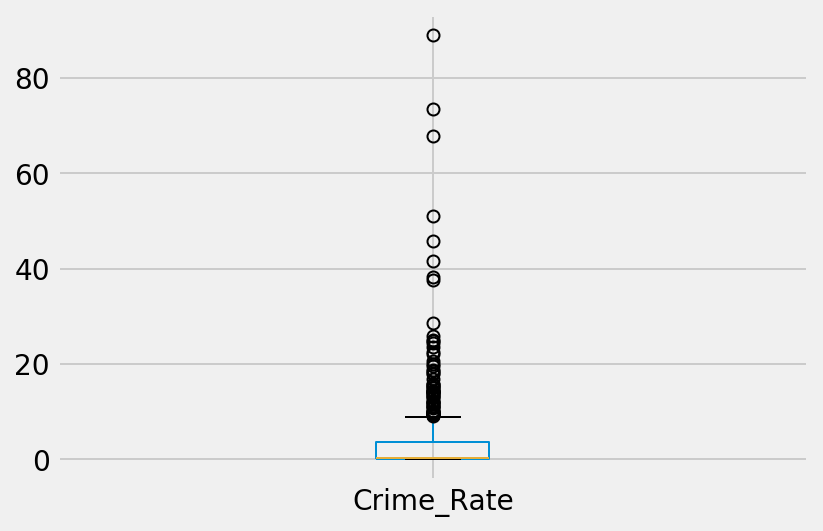

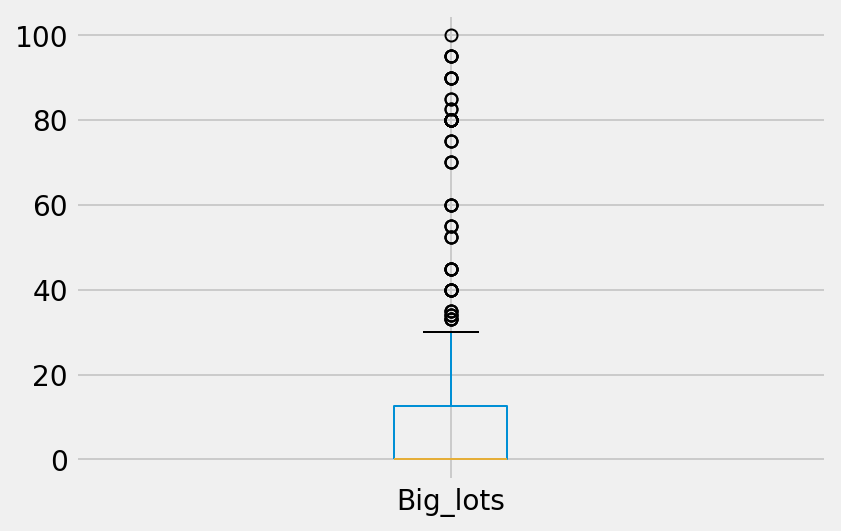

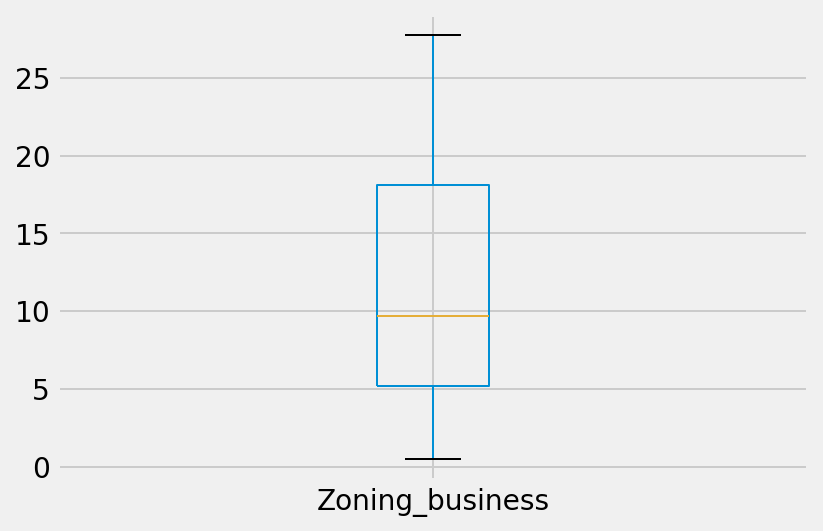

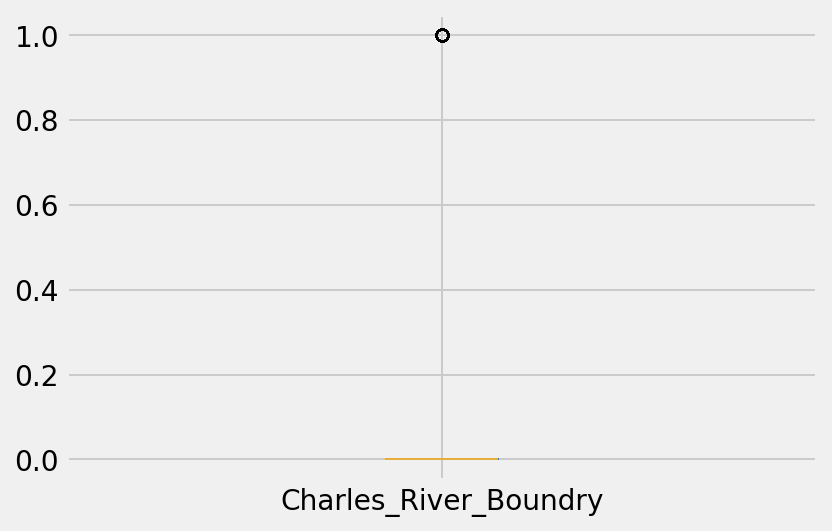

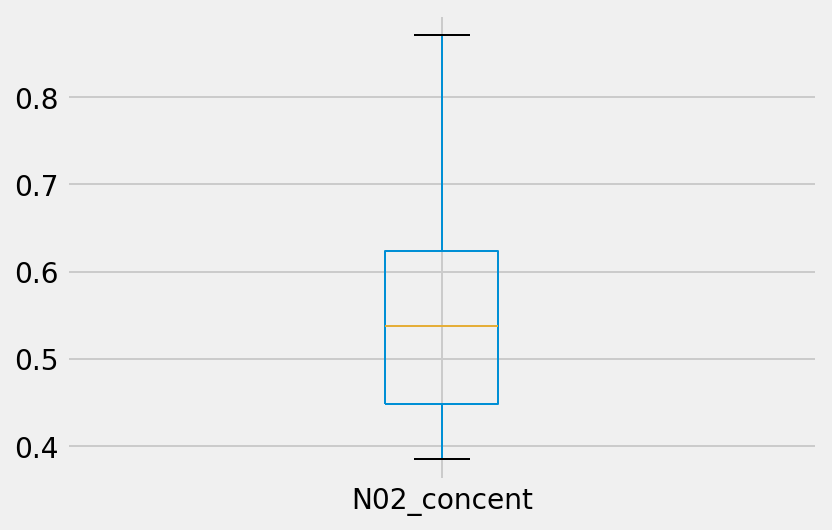

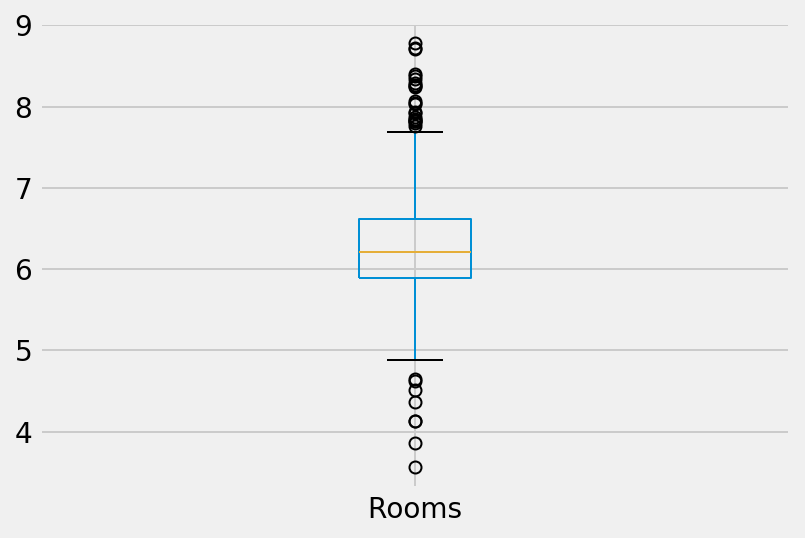

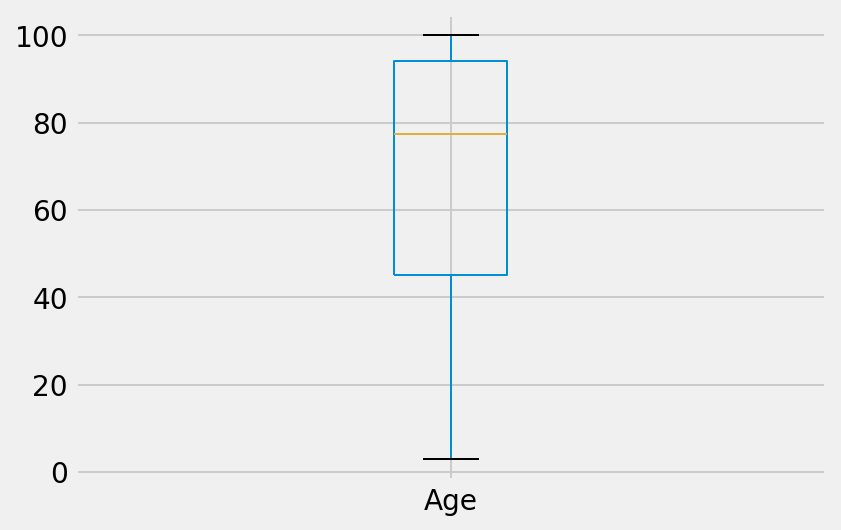

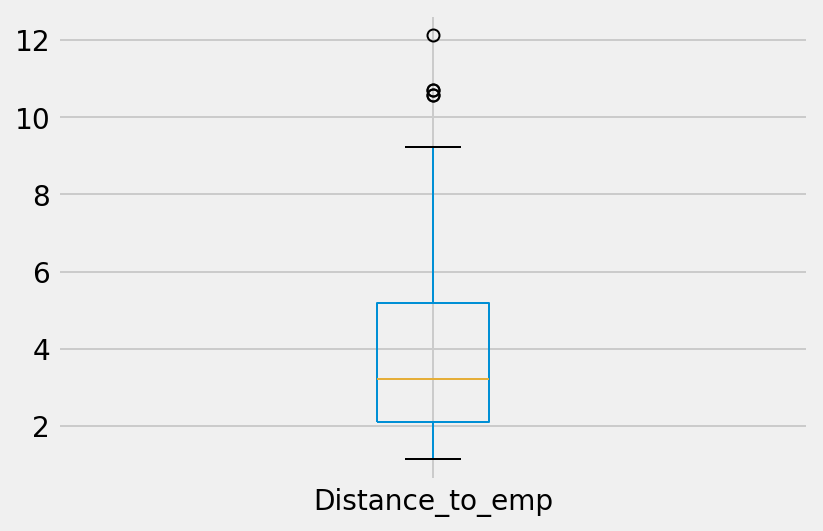

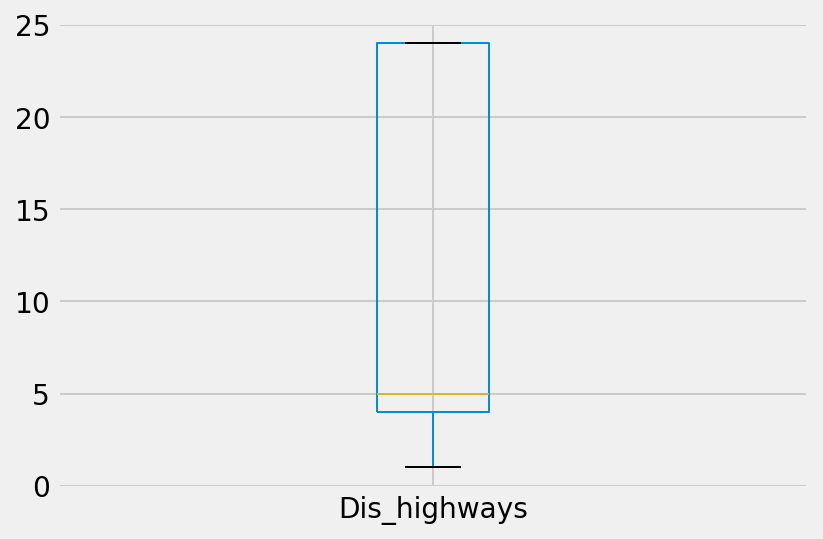

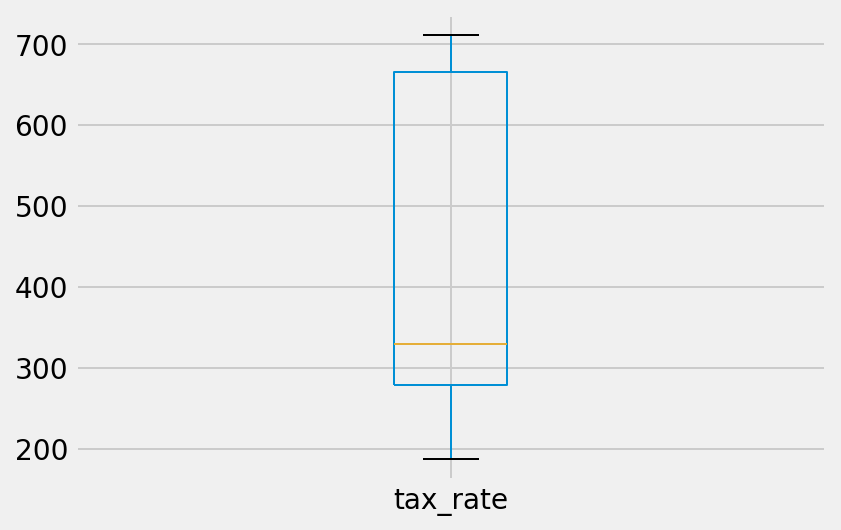

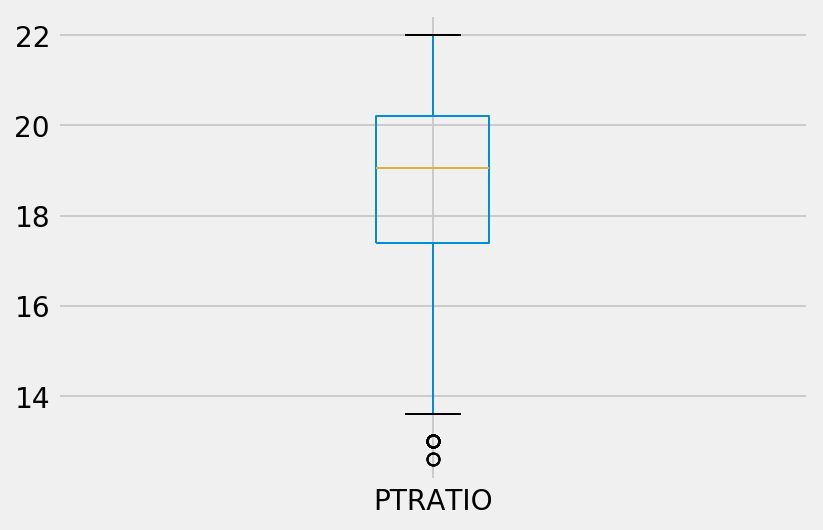

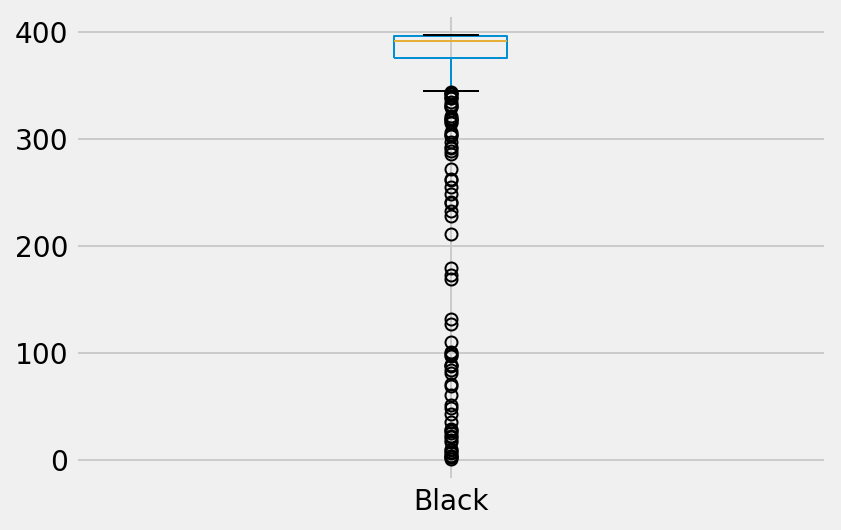

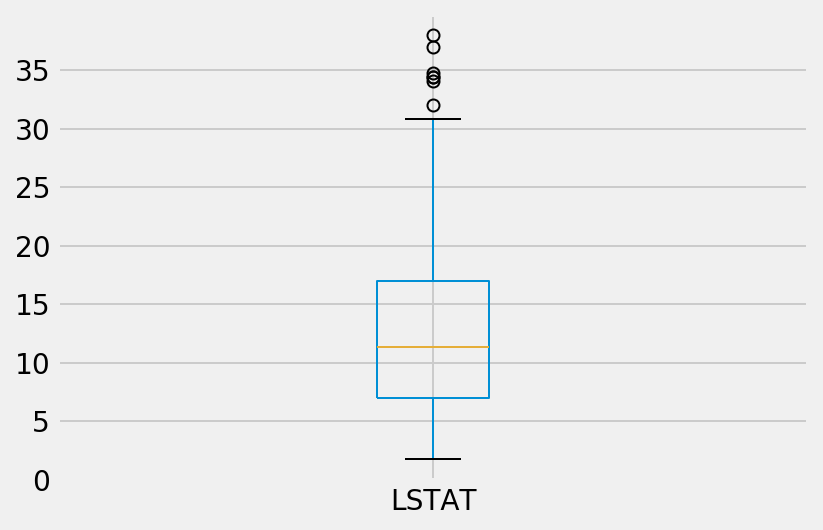

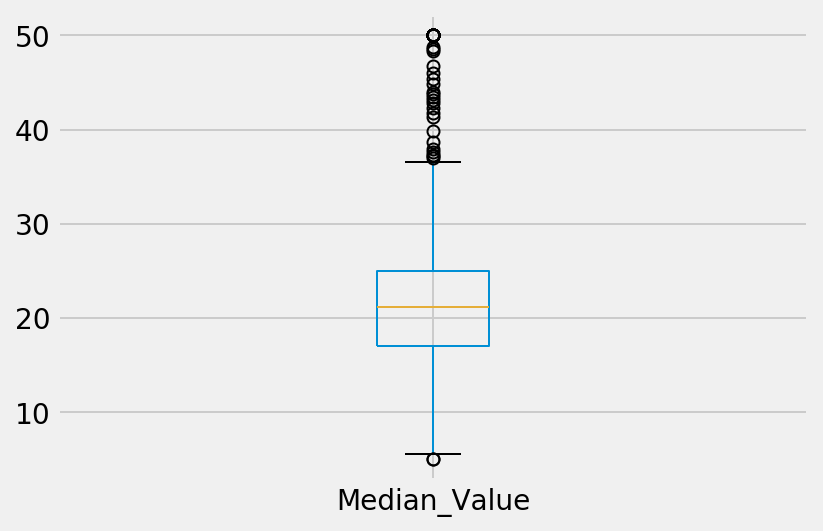

In [47]:
for col in X.columns: 
    X[col].plot(kind='Box')
    plt.show()

In [48]:
mask = X['Crime_Rate'] > 35
X_clean = X.drop(X[mask].index)

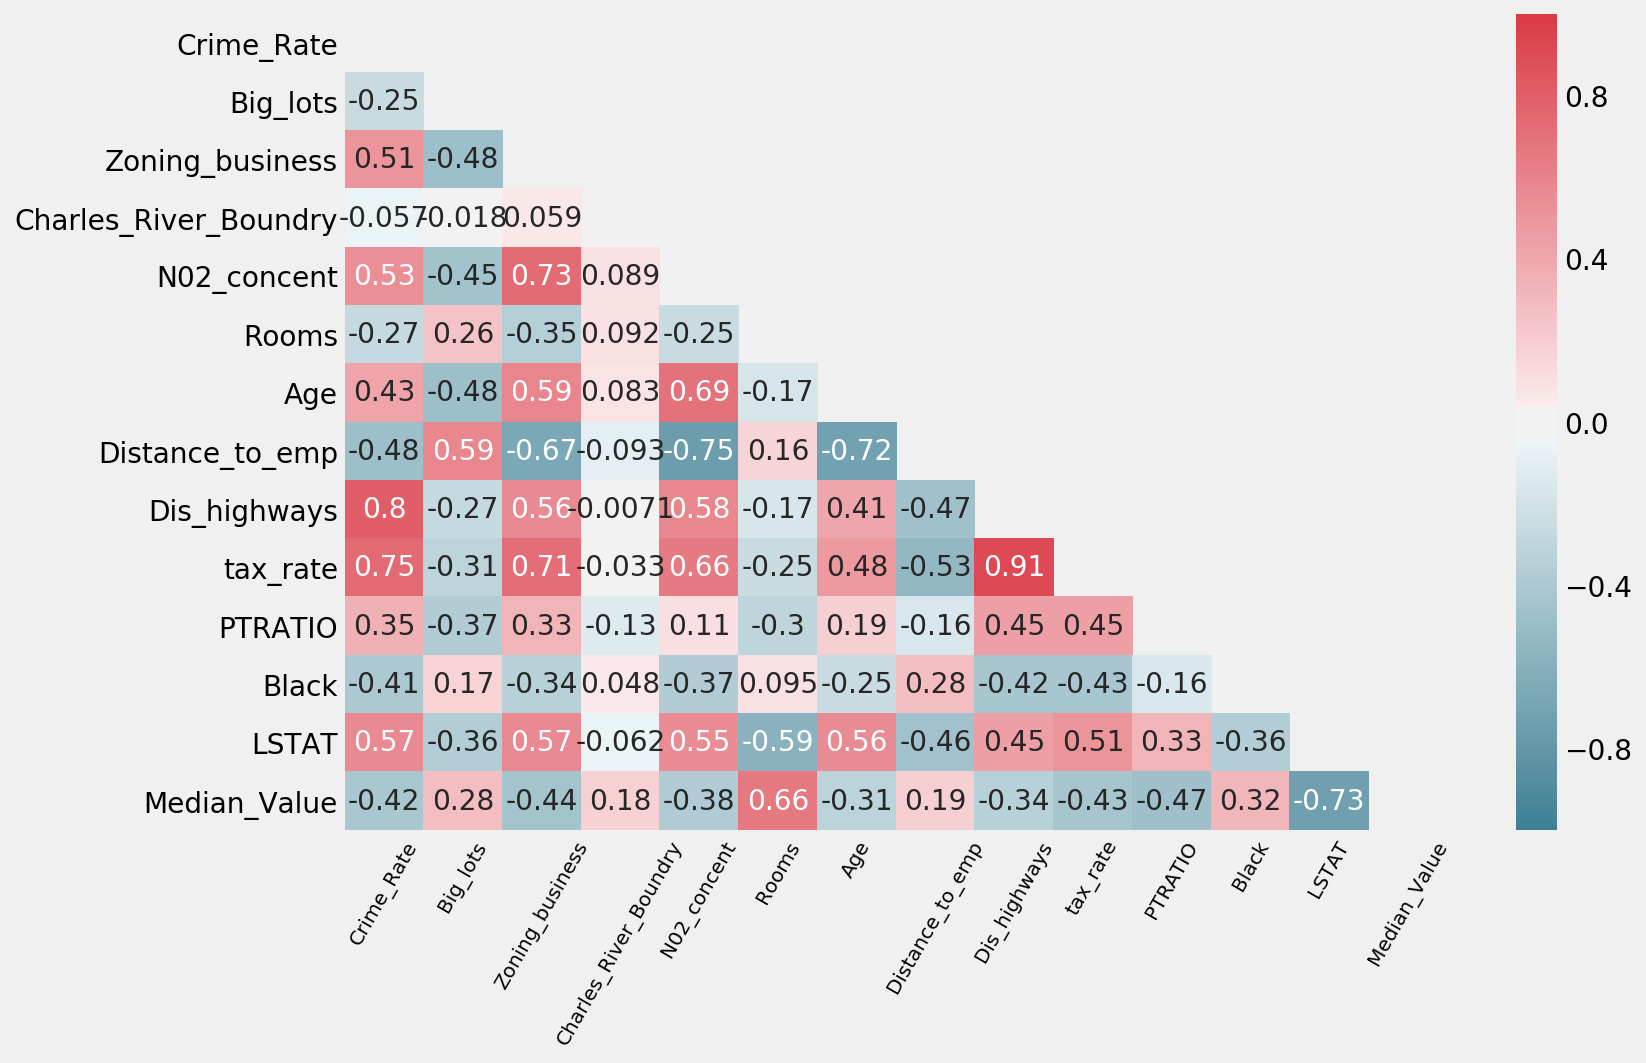

In [52]:
mask2 = X_clean['Big_lots'] > 60
X_clean = X_clean.drop(X_clean[mask2].index)
correlation_heat_map(X_clean)

In [53]:
y = X_clean['Median_Value'].copy()
X_clean = X_clean.drop('Median_Value', axis=1)
len(X_clean), len(y)

(463, 463)

In [51]:
def correlation_heat_map(df):
    corrs = df.corr()
    
    fig, ax = plt.subplots(figsize=(11,7))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=60)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()


### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [58]:
# A:
X_new1 = X_clean[['Zoning_business', 'Rooms', 'Crime_Rate']]
x_train, x_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.5, random_state=42)

In [63]:
slr = LinearRegression()
slr.fit(x_train, y_train)
print('R-squared Train = {}'.format(slr.score(x_train, y_train)))
print('R-squared Test = {}'.format(slr.score(x_test, y_test)))

R-squared Train = 0.5689858102035147
R-squared Test = 0.4337616300349988


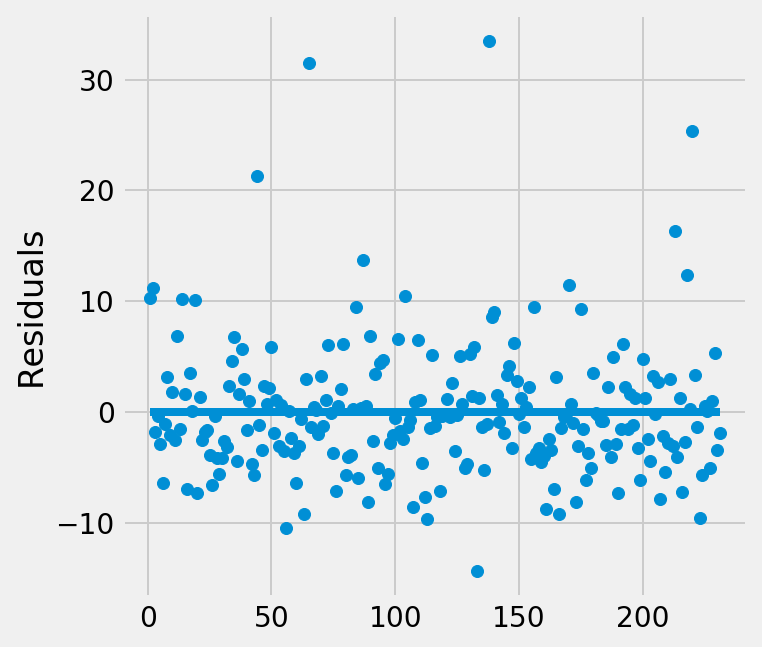

In [73]:
residuals = y_train - slr.predict(x_train)
len(residuals)
x = np.arange(1, 232)
fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.scatter(x, residuals)
ax = plt.plot((x.min(), x.max()), (0, 0))
plt.ylabel('Residuals')
plt.show()

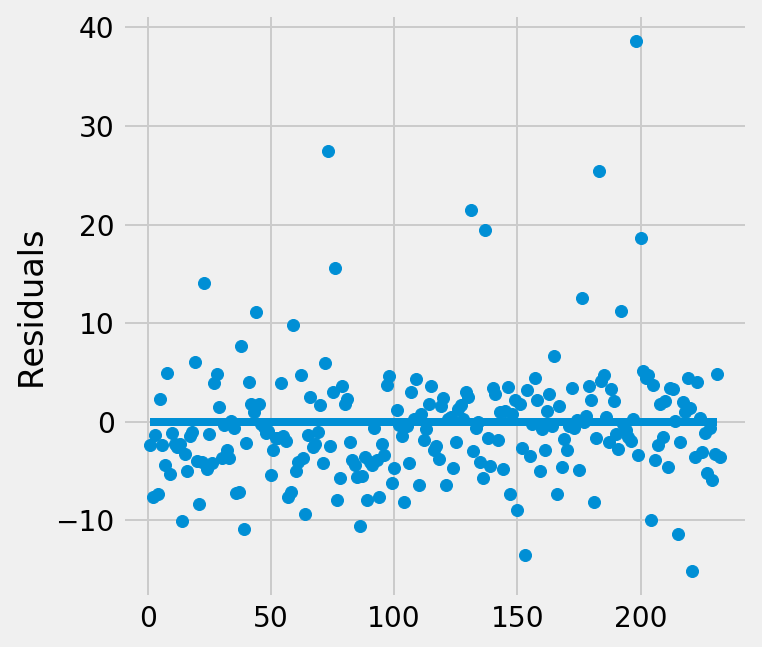

In [75]:
residuals2 = y_test - slr.predict(x_test)
x2 = np.arange(1, 233)
fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.scatter(x2, residuals2)
ax = plt.plot((x.min(), x.max()), (0, 0))
plt.ylabel('Residuals')
plt.show()

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

R-squared Train = 0.5343153841672145
R-squared Test = 0.4218627161732953


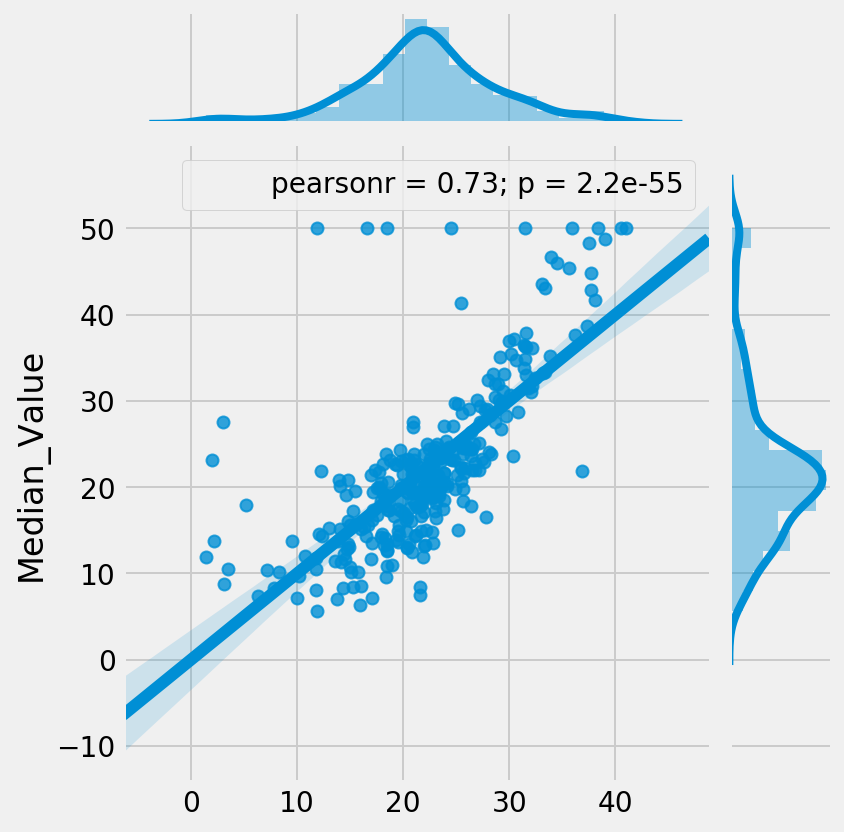

In [78]:
# A:
x_train, x_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.3, random_state=42)
slr = LinearRegression()
slr.fit(x_train, y_train)
print('R-squared Train = {}'.format(slr.score(x_train, y_train)))
print('R-squared Test = {}'.format(slr.score(x_test, y_test)))
sns.jointplot(slr.predict(x_train), y_train, kind='reg')

R-squared Train = 0.5159419517349835
R-squared Test = 0.4803888819266814


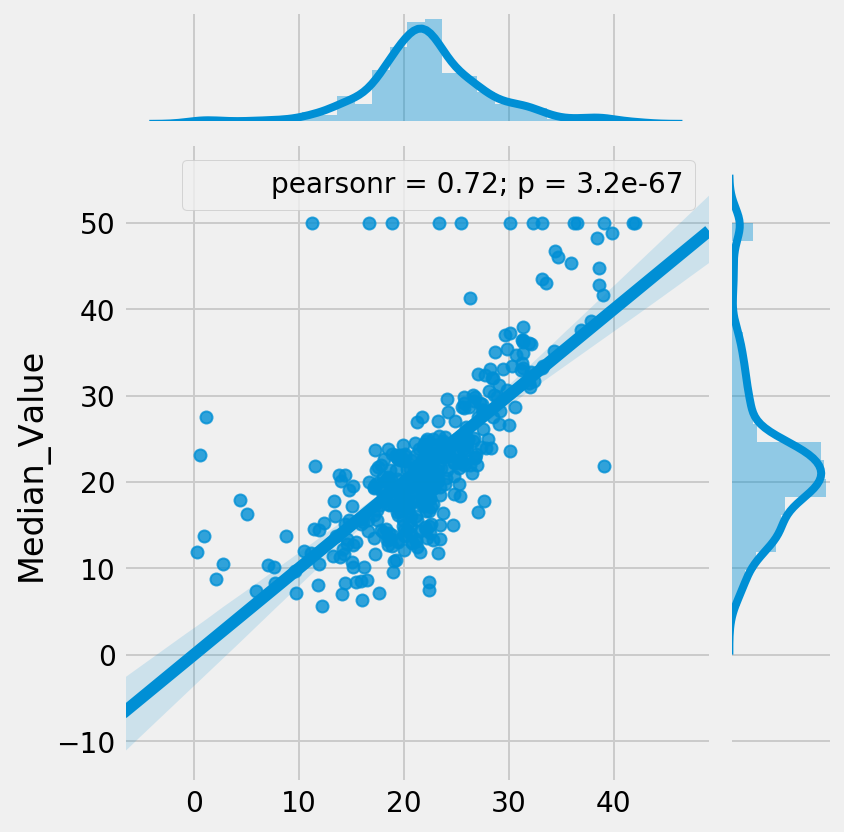

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.1, random_state=42)
slr = LinearRegression()
slr.fit(x_train, y_train)
print('R-squared Train = {}'.format(slr.score(x_train, y_train)))
print('R-squared Test = {}'.format(slr.score(x_test, y_test)))
sns.jointplot(slr.predict(x_train), y_train, kind='reg')

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [81]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics 

In [89]:
# A:
lr = LinearRegression()
scores5 = cross_val_score(slr, X_new1, y, cv=5)
scores10 = cross_val_score(slr, X_new1, y, cv=10)
print(scores5, '\n',  scores10)

[ 0.45768289  0.56528182  0.50108862 -0.36112335 -1.25976784] 
 [ 0.25331537  0.74016123 -0.53893533  0.34949468  0.73671382  0.51298084
 -0.04887124 -0.44393881 -6.34833793  0.27210077]


### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [118]:
# A:
from itertools import permutations

p = permutations(X_clean.columns, r=3)
list(list(p)[1])

['Crime_Rate', 'Big_lots', 'Charles_River_Boundry']

In [129]:
def optomizer(df):
    length = len(df.columns)
    r_2 = []
    combos = []
    for x in range(3):
        p = permutations(df.columns, r=x)
        for combo in p:
            combo = list(combo)
            slr = LinearRegression()
            slr = slr.fit(df[[combo]], y)
            r_2.append(slr.score(df[[combo]], y))
            combos.append(combo)
    return r_2, combos
        
optomizer(X_clean)

TypeError: unhashable type: 'list'

### 5.1) Explain what could be wrong with this approach.

In [9]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [10]:
import patsy

# A: